In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("https://raw.githubusercontent.com/LeonidPilyugin/mpl-style/refs/heads/main/simple.mplstyle")

In [6]:
results = {}
for path in Path("data").glob("*"):
    df = pd.read_csv(path)
    nvac = df["true_nvac"].mean()
    he = float(path.stem.split("-")[-1])
    r = df["r_best"].mean()
    max_error = abs((df["vac_with_best"] - df["true_nvac"]).max())
    mean_error = abs((df["vac_with_best"] - df["true_nvac"]).mean())

    if he not in results:
        results[he] = {
            "r": [],
            "max_error": [],
            "mean_error": [],
            "nvac": [],
        }

    results[he]["r"].append(r)
    results[he]["nvac"].append(nvac)
    results[he]["max_error"].append(max_error)
    results[he]["mean_error"].append(mean_error)
    

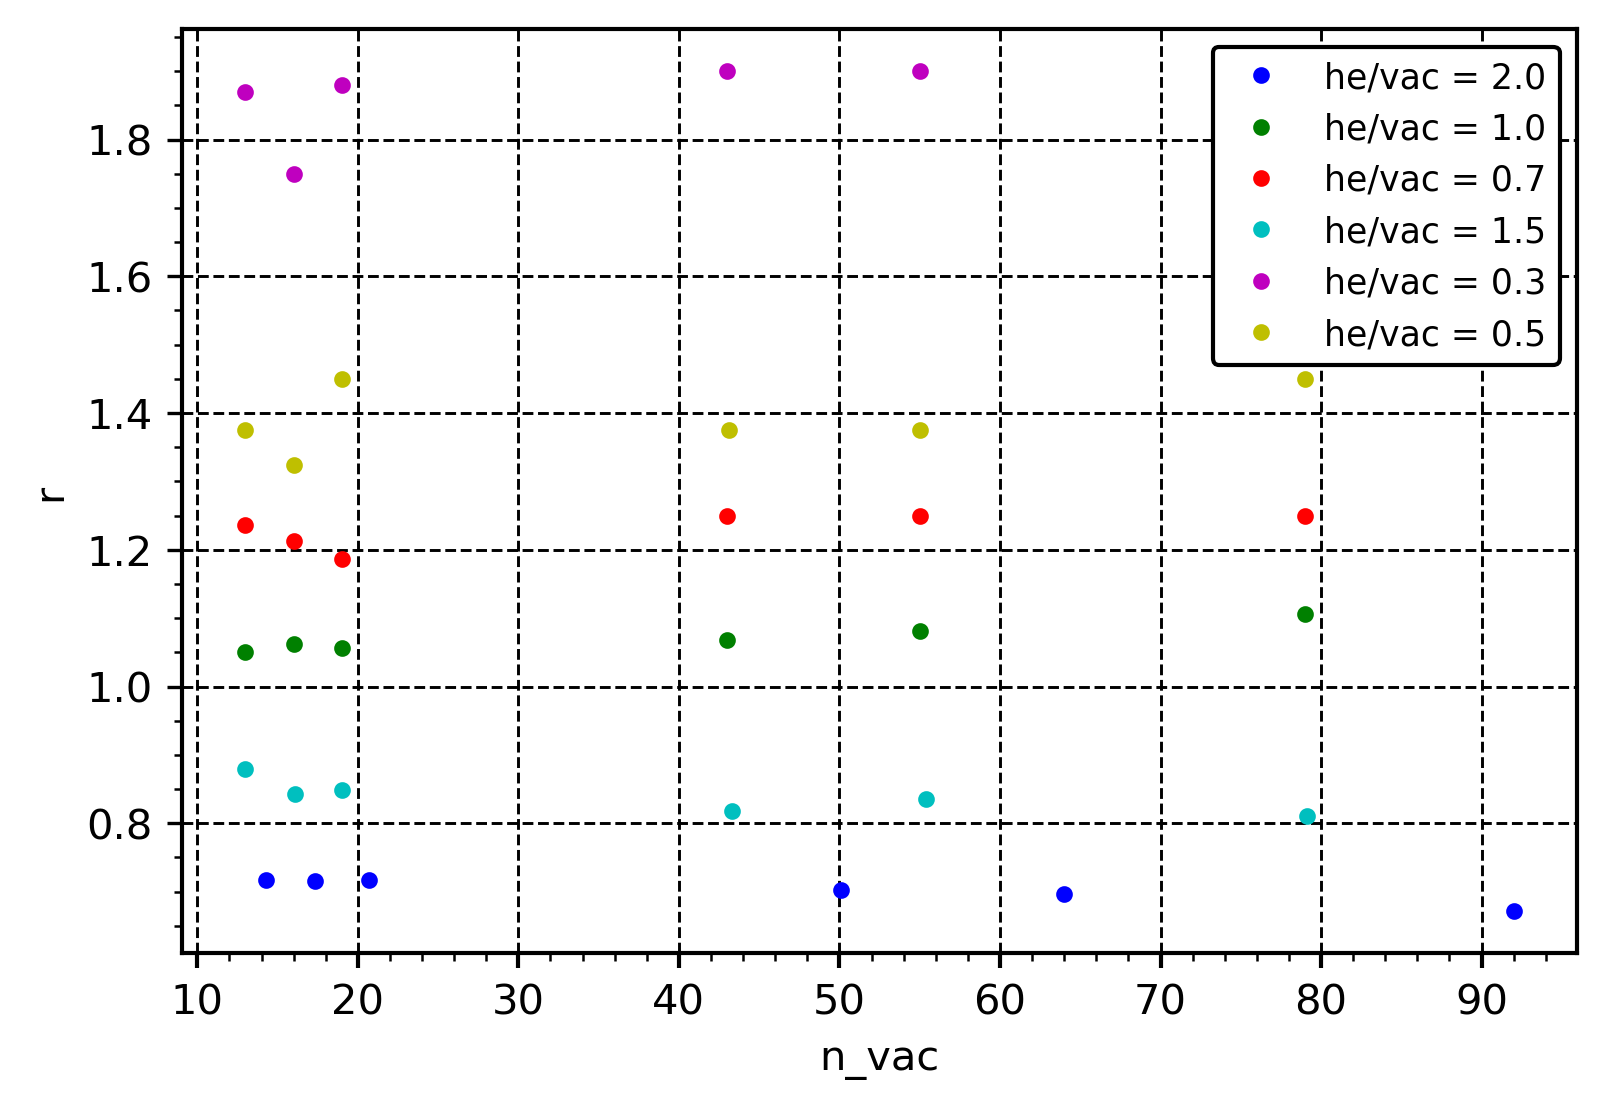

In [22]:
for k, v in results.items():
    plt.plot(v["nvac"], v["r"], '.', label=f"he/vac = {k}")
plt.xlabel("n_vac")
plt.ylabel("r")
plt.legend()
plt.savefig("plot1.png")

In [18]:
ks = results.keys()
rs = []
for k, v in results.items():
    rs.append(np.mean(v["r"]))

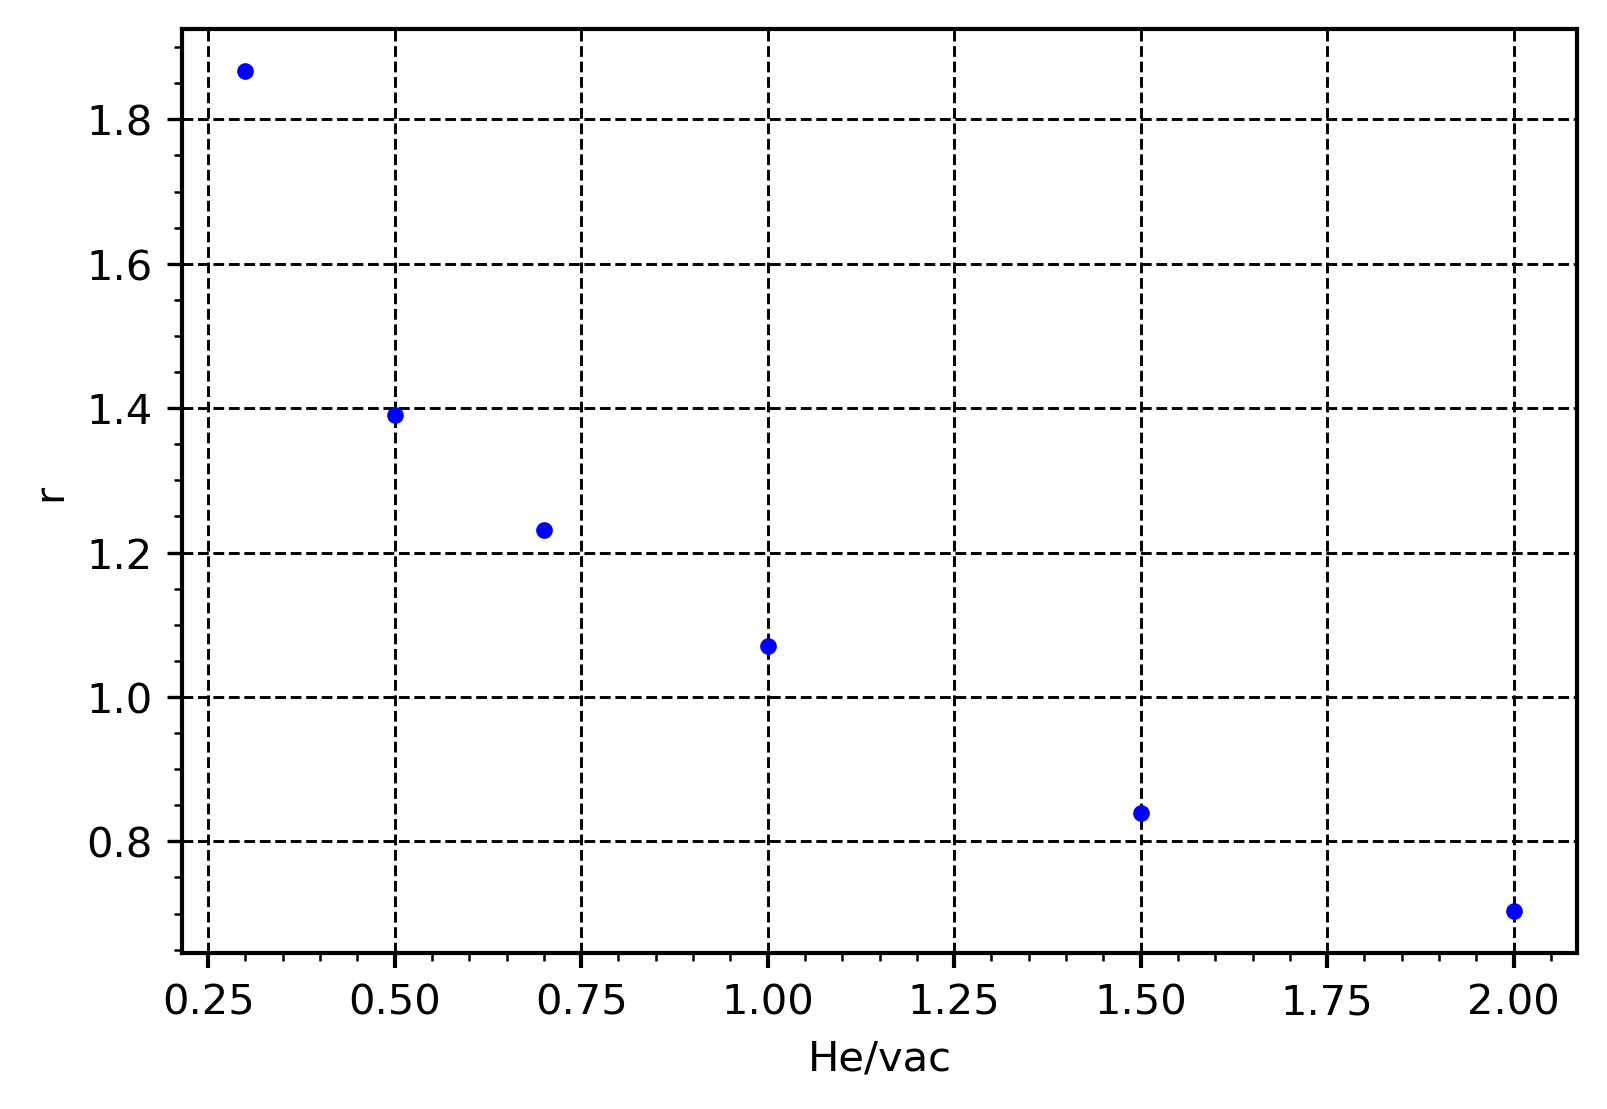

In [23]:
plt.plot(ks, rs, '.')
plt.xlabel("He/vac")
plt.ylabel("r")
plt.savefig("plot2.png")

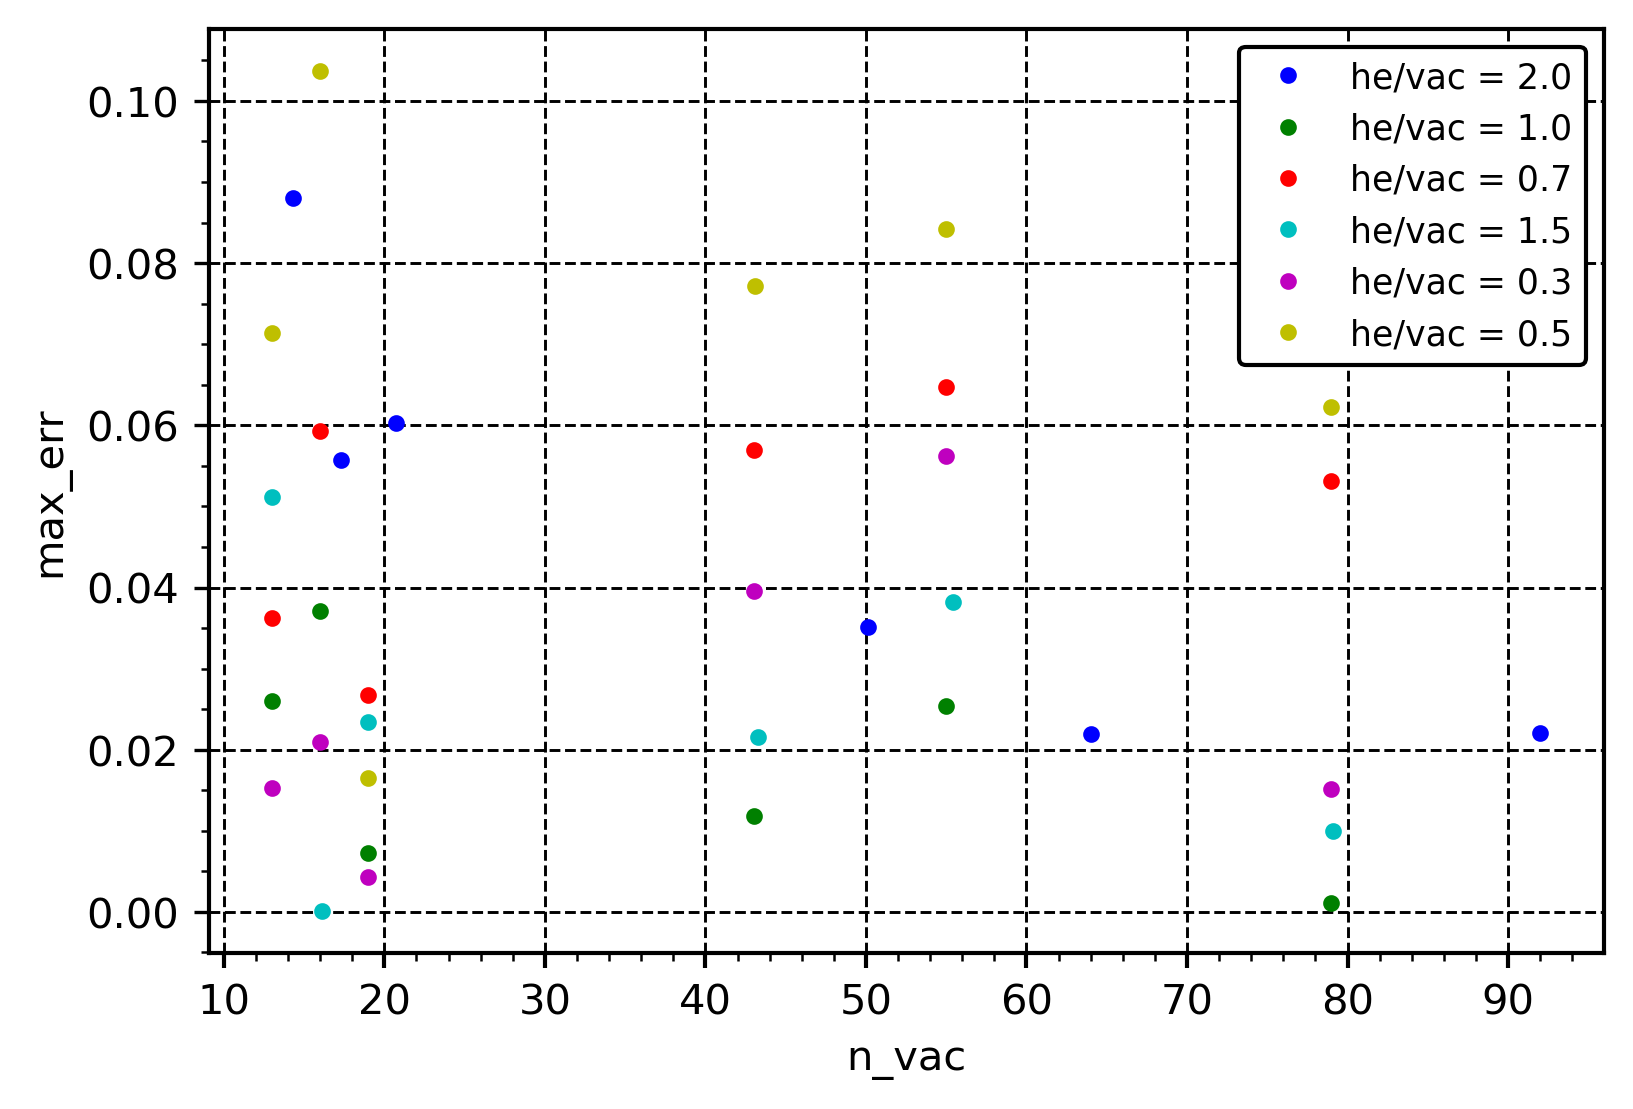

In [26]:
for k, v in results.items():
    plt.plot(v["nvac"], np.asarray(v["max_error"]) / np.asarray(v["nvac"]), '.', label=f"he/vac = {k}")
plt.xlabel("n_vac")
plt.ylabel("max_err")
plt.legend()
plt.savefig("plot3.png")